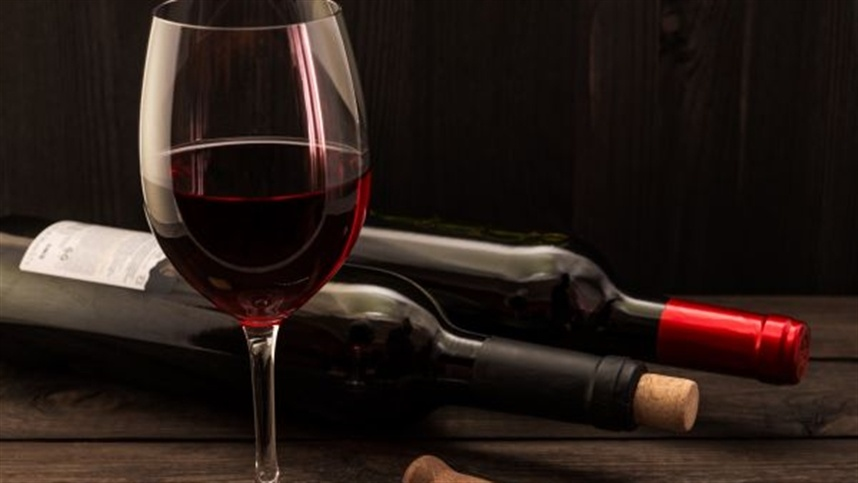

Wine Quality Prediction is a classic machine learning project where the goal is to predict the quality of wine based on its physicochemical properties (e.g., acidity, sugar, pH, alcohol). The dataset sourced from the UCI repository, includes both red and white wines, with quality scores rated by experts.

In addition, this project can be treated as either a regression or classification problem and is ideal for practicing data preprocessing, feature engineering, and model evaluation. Models like Random Forest, SVM, or XGBoost are commonly used.

In [1]:
pip install lazypredict

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.7/24.7 MB 50.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 677.0/677.0 kB 43.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.6/201.6 kB 20.0 MB/s eta 0:00:00


In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
from lazypredict.Supervised import LazyClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

In [10]:
np.random.seed(42)

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep = ';')
data_copy = data.copy()

data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5
1,7.80,0.88,0.00,2.60,0.10,25.00,67.00,1.00,3.20,0.68,9.80,5
2,7.80,0.76,0.04,2.30,0.09,15.00,54.00,1.00,3.26,0.65,9.80,5
3,11.20,0.28,0.56,1.90,0.07,17.00,60.00,1.00,3.16,0.58,9.80,6
4,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5
5,7.40,0.66,0.00,1.80,0.07,13.00,40.00,1.00,3.51,0.56,9.40,5
6,7.90,0.60,0.06,1.60,0.07,15.00,59.00,1.00,3.30,0.46,9.40,5
7,7.30,0.65,0.00,1.20,0.07,15.00,21.00,0.99,3.39,0.47,10.00,7
8,7.80,0.58,0.02,2.00,0.07,9.00,18.00,1.00,3.36,0.57,9.50,7
9,7.50,0.50,0.36,6.10,0.07,17.00,102.00,1.00,3.35,0.80,10.50,5


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
data.shape

(1599, 12)

Using "*.shape* " we can learn size of our  dataset (number of columns and rows)

In [6]:
data.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


Alternatively, we can use "*.isna().sum()* ", there is no difference between them.

Eventually, **we don't have any NULL values**.

quality
0    1382
1     217
Name: count, dtype: int64


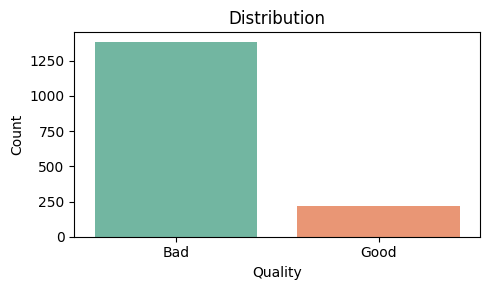

In [12]:
# Convert quality to binary: if >= 7 is 'good' (1) else < 7 is 'bad' (0)

data['quality'] = data['quality'].apply(lambda x: 1 if x >= 7 else 0)
print(data['quality'].value_counts())

plt.figure(figsize = (5, 3))
sns.countplot(x = 'quality', data = data, palette = 'Set2')
plt.title('Distribution')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.xticks([0, 1], ['Bad', 'Good'])
plt.tight_layout()
plt.show()

First of all, let's explain the column explicitly, in here we have *2 values (0 and 1)*

*   0 -> Bad quality.
*   1 -> Good quality.

In out dataset consists of **1382 bad and 217 good** data.

*Yeah, spotting the imbalance is like finding a glitch in the Matrix — cool, but in machine learning, even the tiniest detail can flip your model upside down… so notice it, respect it, but don’t build a temple around it!*

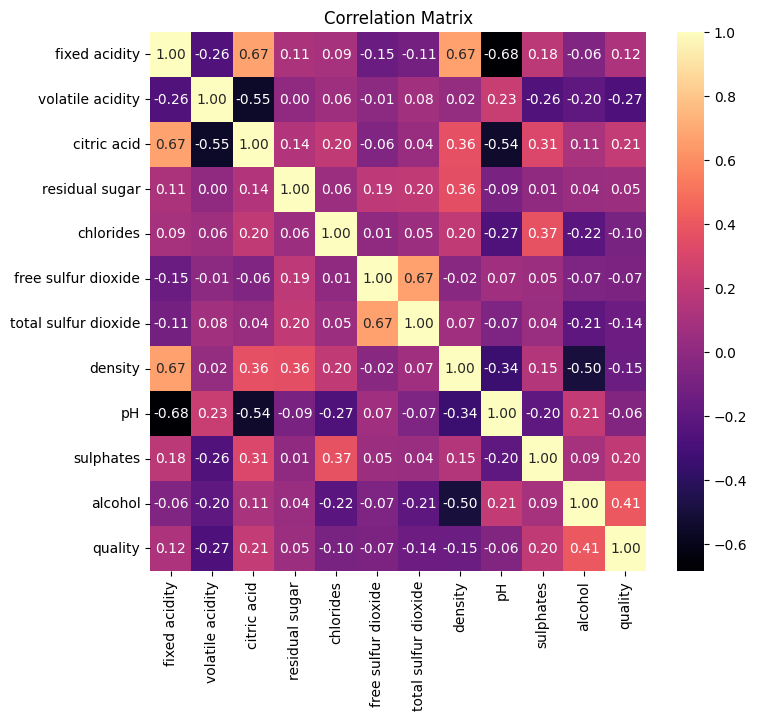

In [15]:
plt.figure(figsize = (8, 7))
sns.heatmap(data.corr(), annot = True, cmap = 'magma', fmt = '.2f')
plt.title('Correlation Matrix')
plt.show()

A correlation matrix shows how strongly different features in your data are related to each other. It gives values between -1 and +1:

- +1 means a strong positive relationship (when one goes up, the other goes up).

- 0 means no relationship.

- -1 means a strong negative relationship (when one goes up, the other goes down).

In wine quality prediction, it helps you see which features (like alcohol or acidity) are most related to wine quality — so you can choose the best ones for your model.

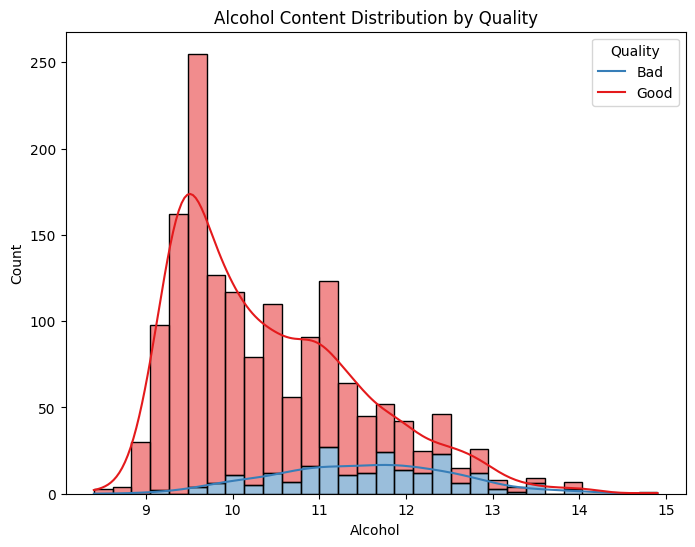

In [17]:
plt.figure(figsize =( 8, 6))
sns.histplot(data = data, x = 'alcohol', hue = 'quality', kde = True, palette = 'Set1', bins = 30, multiple = 'stack')
plt.title('Alcohol Content Distribution by Quality')
plt.xlabel('Alcohol')
plt.ylabel('Count')
plt.legend(title = 'Quality', labels = ['Bad', 'Good'])
plt.show()

* ***Alcohol Content Distribution by Quality***

Histogram shows how the **alcohol content** is distributed for **good** and **bad** quality wines.

1. The data is divided into bins, and the bars are stacked based on wine quality.
2. The *hue='quality'* highlights the difference between classes using color.
3. The **KDE curve** shows the overall distribution shape.
4. From this plot, we can visually compare how alcohol levels vary across good and bad wines. For instance, *good wines often have higher alcohol content*.

In [18]:
# features and target
x = data.drop('quality', axis = 1)
y = data['quality']

# split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify = y)

# Scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

* Why *stratify = y*?

Stratification refers to a method used during data splitting (e.g., in train-test splits or cross-validation) to ensure that the proportion of classes in the target variable is preserved across all subsets. In the context of our dataset for fraud detection, where the target variable "Class" is highly imbalanced (approximately 0.17% fraud cases, Class=1, and 99.83% non-fraud cases, Class=0), stratification plays a crucial role to maintain representative class distributions in both training and test sets.

In fact, without stratification, random splitting could result in subsets with disproportionate class ratios, such as a training set with few or no fraud cases, leading to poor model learning, or a test set with an unrealistic number of frauds, yielding misleading performance metrics (e.g., precision, recall, F1 score). For that reason, it ensures that each subset reflects the original dataset’s class distribution, enabling the model (e.g., XGBoost in your project) to train effectively on fraud patterns and providing reliable evaluation metrics for imbalanced data.

In a nutshell, stratification ensures that both training and testing sets have the same class proportions as the original dataset — which is crucial for imbalanced datasets like fraud detection.

* *Scaling*

Scaling in ML is all about getting your data to play nice together so your model doesn't trip over numbers that are on totally different scales like height in CMs say 180 and weight in KGs say 80 without scaling big numbers can bully smaller ones in algorithms like KNN, SVM or neural networks because they rely on distances or gradients scaling makes sure every feature gets an equal shot so your model learns better and faster its super important for stuff like gradient descent where big differences in scale can slow things down or mess up results plus it keeps things fair so no feature dominates just cause its numbers are bigger you dont always need scaling though like with decision trees or random forests since they don't care about scale but for most other models its a must.

Now, let's talk two big scaling methods **MinMaxScaler and Z-score** standardization a.k.a StandardScaler;

** *MinMaxScaler* ** takes your data and squashes it into a set range usually 0 to 1 it works by taking each value subtracting the smallest value in the feature and dividing by the range which is max minus min the formula is x scaled equals $X_{\text{scaled}} = \frac{X - X_{\min}}{X_{\max} - X_{\min}}$* so if the heights are 170, 180, 190 the "min is 170",  "max is 190",  "range is 20". Thus,

* 180 => 180 minus 170 divided by 20 which is *0.5*
* 170 => 170 minus 170 divided by 20 which is *0.0*
* 190 => 190 minus 170 divided by 20 which is *1.0*

Eventually, this puts everything between 0 and 1 keeping the relative distances between values its great for models that like bounded data like NNs but watch out for outliers cause a crazy high or low value can squish everything else.

On the other hand, * **Z-score standardization or StandardScaler** * is different it makes your data have a mean of 0 and a standard deviation of 1 basically centering it around zero with a consistent spread the formula is, ($X_{\text{scaled}} = \frac{X - \mu}{\sigma}$). This method assumes your data is kinda normal bell curve ish and works awesome for algorithms like linear regression or SVM but outliers can mess with the mean and standard deviation so if your data’s wild you might need something else like RobustScaler.

* Mean: $\mu = \frac{180 + 170 + 190}{3} = 180$
* Std: $\sigma = \sqrt{\frac{(180-180)^2 + (170-180)^2 + (190-180)^2}{3}} = \sqrt{\frac{0 + 100 + 100}{3}} \approx 8$

Then;
* Z(180) => 180 minus 180 divided by 8 which is *0.0*
* Z(170) => 170 minus 180 divided by 8 which is *-1.2*
* Z(190) => 190 minus 180 divided by 8 which is *1.2*

Key points always scale after splitting your data into training and test sets to avoid data leakage where test info sneaks into training only fit your scaler on training data then use it to transform both training and test data MinMax is good for bounded ranges Z-score is better for normally distributed data if you got outliers RobustScaler might be your friend since it uses medians instead of means you can also reverse scaling to get back to original values which is handy for interpreting results.


In [19]:
lazy = LazyClassifier(verbose = 0, ignore_warnings = True, custom_metric = f1_score)
models, preds = lazy.fit(x_train, x_test, y_train, y_test)

print(models)

  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 174, number of negative: 1105
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000220 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1030
[LightGBM] [Info] Number of data points in the train set: 1279, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.136044 -> initscore=-1.848545
[LightGBM] [Info] Start training from score -1.848545
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.94               0.83     0.83      0.94   
XGBClassifier                      0.94               0.82     0.82      0.94   
DecisionTreeClassifier             0.91               0.82     0.82      0.91   
GaussianNB                         0.86  

* ***LazyPredict***

It is a Python library that helps you quickly compare the performance of many machine learning models with very little code.

* It automatically fits multiple models on the dataset.
* It gives a summary table showing metrics like **accuracy**, **f1 score**, **training time**, and **prediction time**.
* We don’t need to manually import and tune each model because it does it for us in one go.

This is useful for *benchmarking* and *choosing the best models* before you dive into fine-tuning or more advanced techniques.

Let's use *XGBClassifier*

In [27]:
# Building a model

model = XGBClassifier(random_state = 42, use_label_encoder = False, eval_metric = 'logloss')
model.fit(x_train, y_train)

pred = model.predict(x_test)

* ***XGBoostClassifier***

It is a powerful machine learning algorithm based on **gradient boosting**. It builds an ensemble of decision trees sequentially, where each new tree corrects the errors of the previous ones.

* Known for its **high accuracy** and **speed**, it’s widely used in classification problems.
* It handles **missing values** and **feature interactions** well.
* It supports regularization to prevent overfitting.
* Often outperforms many other classifiers in structured/tabular data.

Accuracy Score: 0.94
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       277
           1       0.88      0.65      0.75        43

    accuracy                           0.94       320
   macro avg       0.91      0.82      0.86       320
weighted avg       0.94      0.94      0.94       320



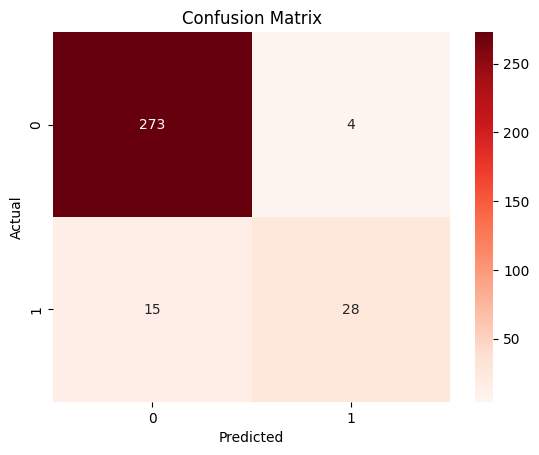

In [28]:
# Accuracy score
print(f'Accuracy Score: {round(accuracy_score(y_test, pred), 2)}')

# Classification report
print(classification_report(y_test, pred))

# Confusion matrix
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

1. ***Accuracy Score***

It measures how well a classification model performs by calculating the percentage of correct predictions out of all predictions made.

* It is the ratio of **correct predictions** to the **total number of cases**.
* The value ranges from **0 to 1** (or 0% to 100%), where **1 (100%)** means perfect accuracy.
* Accuracy is easy to understand but can be misleading if classes are imbalanced.


2. ***Classification Report***

It summarizes a classification model’s performance by showing key metrics for each class, including:

* *Precision*: How many predicted positives are actually correct.
* *Recall* (Sensitivity): How many actual positives the model correctly identified.
* *F1-Score*: The balance between precision and recall.
* *Support*: The number of true instances for each class.

This report helps you understand not just overall accuracy, but also how well the model performs on each class — especially important when classes are imbalanced.


3. ***Confusion Matrix***

A confusion matrix is a table that shows how well your model did at predicting stuff, like frauds (Class=1) versus non-frauds (Class=0). It compares what your model predicted to what’s actually true, breaking it down into four boxes; true positives, true negatives, false positives, and false negatives. It’s super useful for fraud detection task because it shows how good XGBoost model is at catching frauds without flagging too many non-frauds.

* *True Positives (TP):* Model says fraud, and it’s actually fraud.
* *True Negatives (TN):* Model says non-fraud, and it’s actually non-fraud.
* *False Positives (FP):* Model says fraud, but it’s non-fraud.
* *False Negatives (FN):* Model says non-fraud, but it’s actually fraud.

From this, we can calculate;

* *Recall* = TP / (TP + FN)
* *Precision* = TP / (TP + FP)
* *F1 Score:* Balances precision and recall.

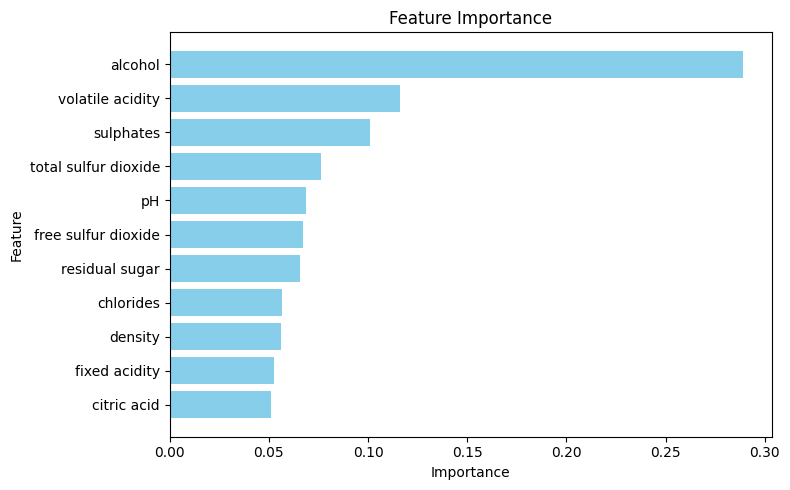

In [29]:
if hasattr(model, 'feature_importances_'):
    fi = pd.DataFrame({
        'Feature': x.columns,
        'Importance': model.feature_importances_}).sort_values(by = 'Importance', ascending = True)

    plt.figure(figsize = (8, 5))
    plt.barh(fi['Feature'], fi['Importance'], color = 'skyblue')
    plt.title('Feature Importance')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()

* ***Feature Importance***

It measures how much each input feature contributes to the predictions of a machine learning model.

* It shows which features have the most influence on the model’s decisions.
* Higher importance means the feature is more relevant in predicting the target.
* Helps in understanding the model and selecting the most useful features.
* Different models calculate feature importance differently (e.g., tree-based models use how much each feature reduces error).

In wine quality prediction, feature importance can reveal which factors, like alcohol or acidity—matter most for determining if a wine is “good” or “bad.”

In [31]:
def predict(input_data):

    input = pd.DataFrame([input_data])
    input = sc.transform(input)
    prediction = model.predict(input)

    return 'Good' if prediction[0] == 1 else 'Bad'

sample = {
    'fixed acidity': 7.4, 'volatile acidity': 0.7, 'citric acid': 0.0,
    'residual sugar': 1.9, 'chlorides': 0.076, 'free sulfur dioxide': 11.0,
    'total sulfur dioxide': 34.0, 'density': 0.9978, 'pH': 3.51,
    'sulphates': 0.56, 'alcohol': 9.4}

print(f"Input: {sample}")
print(f"Predicted Quality: {predict(sample)}")

Input: {'fixed acidity': 7.4, 'volatile acidity': 0.7, 'citric acid': 0.0, 'residual sugar': 1.9, 'chlorides': 0.076, 'free sulfur dioxide': 11.0, 'total sulfur dioxide': 34.0, 'density': 0.9978, 'pH': 3.51, 'sulphates': 0.56, 'alcohol': 9.4}
Predicted Quality: Bad


The Wine Quality Prediction project, utilizing LazyPredict, identified XGBoost as the optimal model, achieving a 94% accuracy in classifying red wines as "good" or "bad." Interactive visualizations and feature importance analysis highlighted key chemical drivers like alcohol and sulphates, making the model valuable for winemakers. Future enhancements could address class imbalance and expand to broader datasets for enhanced applicability.

In [32]:
# Finally

***I WOULD LIKE TO EXPRESS MY SINCERE GRATITUDE FOR YOUR TIME AND CONSIDERATION***

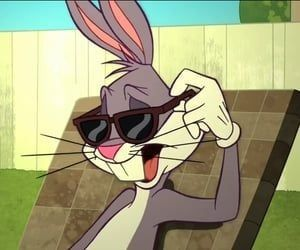